In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw02.ipynb")

<a id='verytop'></a>

# Homework 2: Prerequisite Review Part 2 & Exploratory Data Analysis

## Due Date: Friday June 6th, 11:59 PM on Gradescope


### Detailed Submission Instructions Are Provided at the end of this Notebook

## Assignment Learning Objectives
- Recognize situations where aggregation is useful and identify the correct technique for performing an aggregation.

 - Perform merges on DataFrames

 - Use and modify Pandas indices
 
 - Identify 5 key data properties to consider when doing Exploratory Data Analysis and implement using data
 
 - Understand and implement methods for conditional selection in Pandas

 - Modify columns in a Pandas Dataframe (add, edit, drop)

- Understand and implement methods for extracting data using .loc, .iloc, and [].

- Manipulate and transform Series and DataFrames using common utility functions (i.e. sort_values, info,  value_counts, shape, describe, unique)

- Define what is meant by structure and granularity in terms of a set of data, and identify the structure and granularity of sample datasets.

- Review key Calculus concepts needed in CSCI 3022

 - Combine Calculus and Discrete Math Prerequisite concepts to determine a Maximum Likelihood Estimate
 



## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Below are examples of acceptable vs unacceptable use of resources and collaboration when doing HW assignments in CSCI 3022.


The following would be some **examples of cheating** when working on HW assignments in CSCI 3022.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given homework problem or one similar is cheating.  However, consulting the class notes, and web pages that explain the material taught in class but do NOT show a solution to the homework problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course notes, the course textbook, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the HW before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by a Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit HW Hours and/or post questions on Discord!



## Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1 | 8 | autograded (via video assignment on Canvas)
Question 2a, c-f | 22 | autograded
Question 2b | 5 | manual
Question 3a | 2 | manual
Question 3b | 4 | manual
Question 4a | 2 | autograded
Question 4b | 2 | manual
Question 4c | 1 | autograded
Question 4d| 4 | manual
|Total | **50**

## Recommended Readings for this HW:

  - [Prerequisite Review Resources posted on the  Modules in Canvas](https://canvas.colorado.edu/courses/117881/pages/prerequisite-review-calculus-and-discrete-structures?module_item_id=6055980) 
 - [Learning Data Science Chapter 6 - All (Subsetting, Aggregating, Joining, Transforming)](https://learningds.org/ch/06/pandas_intro.html)
 - [Learning Data Science Section 8.6 (Table Shape and Granularity)](https://learningds.org/ch/08/files_granularity.html#table-shape-and-granularity)
 


<a id='top'></a>
---
**Shortcuts:**   [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)
---

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />



### Importing Libraries and Magic Commands

In CSCI 3022, we will be using common Python libraries to help us process data. There are also a set of standard aliases that are used to shorten the library names. Below are some of the libraries that you may encounter throughout this assignment, along with their respective aliases.  Run the cell below

In [1]:
# Run this cell:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from csci3022_utils import *




<a id='p1'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 1: Pandas Bootcamp Part 2 - Video Assignment (8 pts) ##

#### Complete this [Pandas Bootcamp Part 2 Video Assignment (click this link)](https://canvas.colorado.edu/courses/117881/assignments/2298257) available on Canvas (to receive points you must watch the entire video and answer the embedded questions).


As you watch the video, use the datasets provided below to fill in the code below along with the video so you can practice functions.  
The video used data as of 2022 for babynames and 2023 for elections.  The data loaded here has been updated to this year, so when running the functions you will get results updated for this new data.  

#### Data: 


**Elections Dataset:**


In [5]:
# Run this cell to load the elections data
elections = pd.read_csv("data/elections.csv")

**Babynames Dataset:**

The United States Social Security office tracks the names of babies who are issued Social Security Cards.  We'll be using [data from their website](https://www.ssa.gov/oact/babynames/state/ ) to analyze babyname popularity over time.


The cell below pulls census data from the SS website for babies born in Colorado and then loads it into a usable form. The code shown here is outside of the scope of CSCI 3022, but you're encouraged to dig into it if you are interested!

Data Scope:  All names are from Social Security card applications for births that occurred in the United States after 1879. Note that many people born before 1937 never applied for a Social Security card, so their names are not included in the data. For others who did apply, thesee records may not show the place of birth, and again their names are not included in our data.
All data are from a 100% sample of records on Social Security card applications as of the end of 2023.

In [23]:
# Just run this cell: to load the babynames data
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "data/babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

state_name = 'CO.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(state_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames

State Sex  Year       Name  Count
0         CO   F  1910       Mary    193
1         CO   F  1910      Helen    112
2         CO   F  1910    Dorothy     87
3         CO   F  1910       Ruth     68
4         CO   F  1910   Margaret     67
...      ...  ..   ...        ...    ...
116920    CO   M  2023       Zain      5
116921    CO   M  2023      Zakai      5
116922    CO   M  2023     Zakari      5
116923    CO   M  2023  Zechariah      5
116924    CO   M  2023  Zephaniah      5

[116925 rows x 5 columns]

## Grouping


To demonstrate how to aggregate columns in Pandas let's start with a smaller subset of our original babynames dataframe.  Run the cell below to create this temporary dataframe:

In [180]:
# Just run this cell to follow along with the demo in the video 
babynames_temp = (babynames.query(" ((Name == 'Brittany' | Name == 'Galilea') & Year == 2008) | ((Name == 'Emma' | Name == 'Olivia') & Year == 2015) | ((Name == 'Marie' | Name == 'Frances') & Year == 1910)")   
                .sort_values(by="Name")
                .reset_index().drop(columns="index")
                 )

babynames_temp

State Sex  Year      Name  Count
0    CO   F  2008  Brittany      5
1    CO   F  2015      Emma    355
2    CO   F  1910   Frances     56
3    CO   F  2008   Galilea      6
4    CO   F  1910     Marie     32
5    CO   F  2015    Olivia    348

### `DataFrameGroupBy` Objects


The key object for grouping in Pandas is .groupby()


We can group rows that share a common feature, then aggregate data across the group.

Syntax  `dataframe.groupby(column_names).agg(aggregation_function)`




The result of `groupby` is not a `DataFrame` or a list of `DataFrame`s. It is instead a special type called a `DataFrameGroupBy`.

In [63]:
# run this code to see that without an aggregation function, just using a groupby doesn't return useful information
grouped_by_year = babynames_temp.groupby("Year")
grouped_by_year

`GroupBy` objects are structured like dictionaries. In fact, we can actually see the dictionaries with the following code:

In [65]:
grouped_by_year.groups

{1910: [2, 4], 2008: [0, 3], 2015: [1, 5]}

The `key`s of the dictionary are the groups (in this case, `Party`), and the `value`s are the **indices** of rows belonging to that group. We can access a particular sub-`DataFrame` using `get_group`:

In [67]:
grouped_by_year.get_group(1910)

State Sex  Year     Name  Count
2    CO   F  1910  Frances     56
4    CO   F  1910    Marie     32

In [75]:
grouped_by_year.get_group(2008)

State Sex  Year      Name  Count
0    CO   F  2008  Brittany      5
3    CO   F  2008   Galilea      6

In [77]:
grouped_by_year.get_group(2015)

State Sex  Year    Name  Count
1    CO   F  2015    Emma    355
5    CO   F  2015  Olivia    348

Once we've formed groups, we can aggregate each sub-dataframe (a.k.a. group) into a single row using an aggregation function. 

Use the cells below to follow along with the examples/code in the video and play around with different aggregation functions.


In [ ]:
# Write code to group on Year and Sum the Count Columns:
...

In [73]:
babynames_temp.groupby("Year").agg("max")

State Sex     Name  Count
Year                          
1910    CO   F    Marie     56
2008    CO   F  Galilea      6
2015    CO   F   Olivia    355

In [ ]:
# Practice with .groupby("Year").first()
...

In [ ]:
# Practice grouping by both Year and Sex
...

#### Syntax Tip for Chained Method Callls

In [69]:
# Example of grouping temp dataframe by year and Summing the values in the "Count" column:

babynames_temp.groupby("Year").agg({"Count":"sum"}).rename(columns = {"Count": "Total Babies that Year"})

Total Babies that Year
Year                        
1910                      88
2008                      11
2015                     703

Notice that the code above consists of a series of what are called **chained method calls**. This sort of code is very very common in Pandas programming and in data science in general. Such chained method calls can sometimes go many layers deep, in which case you might consider adding newlines between lines of code for clarity. For example, we could instead write the code above as:

In [82]:
# pandas method chaining - surround code after equals sign with parantheses and then can break lines

(
babynames_temp.groupby("Year") 
                .agg({"Count":"sum"})
                .rename(columns = {"Count":"Total Babies that Year"})
    
)    

Total Babies that Year
Year                        
1910                      88
2008                      11
2014                      10

Note that we have surrounded the entire call by a big set of parentheses so that Python doesn't complain about the indentation. An alternative is to use the \ symbol to indicate to Python that your code continues on to the next line!

In [80]:
# pandas method chaining (alternative) end lines with \


babynames_temp.groupby("Year")  \
                .agg({"Count":"sum"}) \
                .rename(columns = {"Count":"Total Babies that Year"})


                    


Total Babies that Year
Year                        
1910                      88
2008                      11
2014                      10

### Case Study: Name "Popularity"

The video walks you step by step through this case study.  Follow along with the video and fill in the code so you can answer the questions embedded in the video.

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [81]:
# Filter babynames to only include names corresponding to sex "F"
f_babynames = ...
f_babynames

State Sex  Year      Name  Count
0        CO   F  1910      Mary    193
1        CO   F  1910     Helen    112
2        CO   F  1910   Dorothy     87
3        CO   F  1910      Ruth     68
4        CO   F  1910  Margaret     67
...     ...  ..   ...       ...    ...
64835    CO   F  2023  Winifred      5
64836    CO   F  2023    Winnie      5
64837    CO   F  2023    Winona      5
64838    CO   F  2023   Yesenia      5
64839    CO   F  2023    Zaylee      5

[64840 rows x 5 columns]

In [ ]:
# We sort the data by year (in case the data is not already sorted this way)
f_babynames = ...
f_babynames

To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

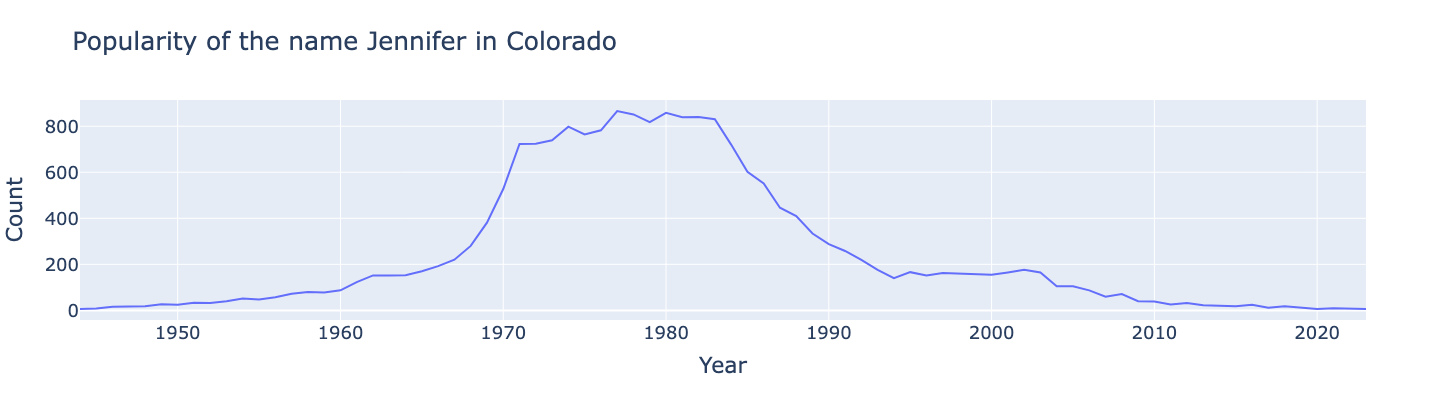

In [185]:
# We'll talk about how to generate plots in a later lecture
fig = px.line(f_babynames[f_babynames["Name"] == "Jennifer"],
              x = "Year", y = "Count",
              title=f"Popularity of the name Jennifer in Colorado")
fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)

We'll need a mathematical definition for the change in popularity of a name.

Let's define the metric "ratio to peak" (RTP). We'll calculate this as the count of the name in the most recent year for which we have data divided by the largest count of this name in *any* year. 

A demo calculation for Jennifer:

In [86]:
# Grab number of Jennifers in the year with the highest Jennifer count
max_jenn = ...
max_jenn

866

In [90]:
# Remember that we sorted f_babynames by year. 
# This means that grabbing the final entry gives us the most recent count of Jennifers:
# 
curr_jenn = ...
curr_jenn

6

In [92]:
# Compute the RTP
curr_jenn / max_jenn

0.006928406466512702

We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [94]:
def ratio_to_peak(series):
    """
    Compute the RTP for a Series containing the counts per year for a single name
    """
    return ...

In [96]:
# Construct a Series containing our Jennifer count data
jenn_counts_ser = ...

# Then, find the RTP
ratio_to_peak(jenn_counts_ser)

0.006928406466512702

Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

You will see a TypeError message when running the cell below. As discussed in the video, `pandas` can't apply an aggregation function to non-numeric data (it doesn't make sense to divide "CO" by a number).

In [100]:
#If you run this you'll get an error
#rtp_table = f_babynames.groupby("Name").agg(ratio_to_peak)
#rtp_table

To avoid the warning message above, try extracting only the numeric columns (that is 'Year' and 'Count') before applying `.agg`:

In [ ]:
# after groupby and before .agg just select numeric coluns
rtp_table = ...
rtp_table

In [107]:
# Recompute the RTPs, but only performing the calculation on the "Count" column
rtp_table = ...
rtp_table

Count
Name             
Aadhya   1.000000
Aaliyah  0.523256
Aanya    1.000000
Aaralyn  0.714286
Aarna    1.000000
...           ...
Zora     1.000000
Zoya     0.857143
Zuleyka  1.000000
Zuri     1.000000
Zyla     1.000000

[3612 rows x 1 columns]

In [115]:
# Rename "Count" to "Count RTP" for clarity
rtp_table = ...
rtp_table

Count RTP
Name              
Aadhya    1.000000
Aaliyah   0.523256
Aanya     1.000000
Aaralyn   0.714286
Aarna     1.000000
...            ...
Zora      1.000000
Zoya      0.857143
Zuleyka   1.000000
Zuri      1.000000
Zyla      1.000000

[3612 rows x 1 columns]

In [117]:
# What name (with Sex = "F") has fallen the most in popularity?
...

Count RTP
Name               
Linda      0.006750
Jennifer   0.006928
Debra      0.007728
Amanda     0.007974
Jessica    0.009926
...             ...
Jules      1.000000
Jude       1.000000
Jozlyn     1.000000
Kaidence   1.000000
Zyla       1.000000

[3612 rows x 1 columns]

We can visualize the decrease in the popularity of the name "Linda:"

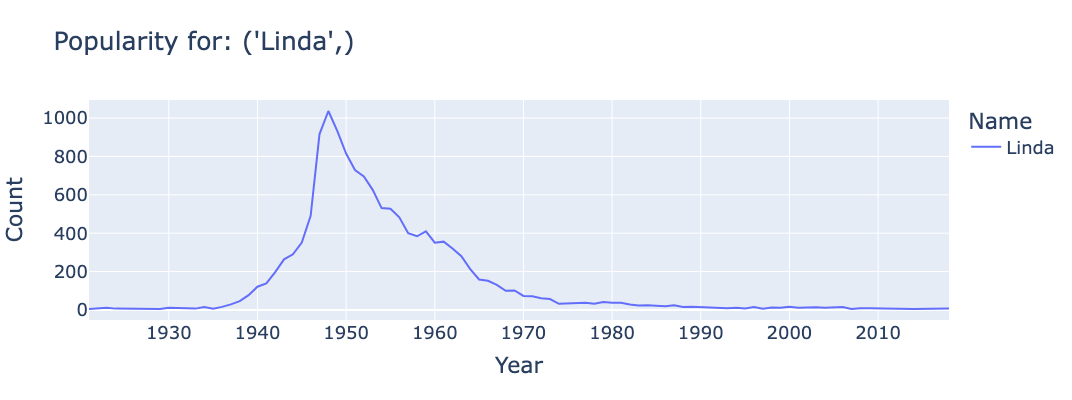

In [172]:
def plot_name(*names):
    fig = px.line(babynames[babynames["Name"].isin(names)], 
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names}")
    fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)
    return fig

plot_name("Linda")

In [174]:
# Is your name in this database? If so, run the function above to plot the popularity of your name in Colorado over time 
# If not, choose a name of one of your friends and plot the popularity
...

In [121]:
# Find the 10 names with Sex = F that have decreased the most in popularity
top10 = ...
top10

Index(['Linda', 'Jennifer', 'Debra', 'Amanda', 'Jessica', 'Patricia', 'Lisa',
       'Shirley', 'Deborah', 'Brittany'],
      dtype='object', name='Name')

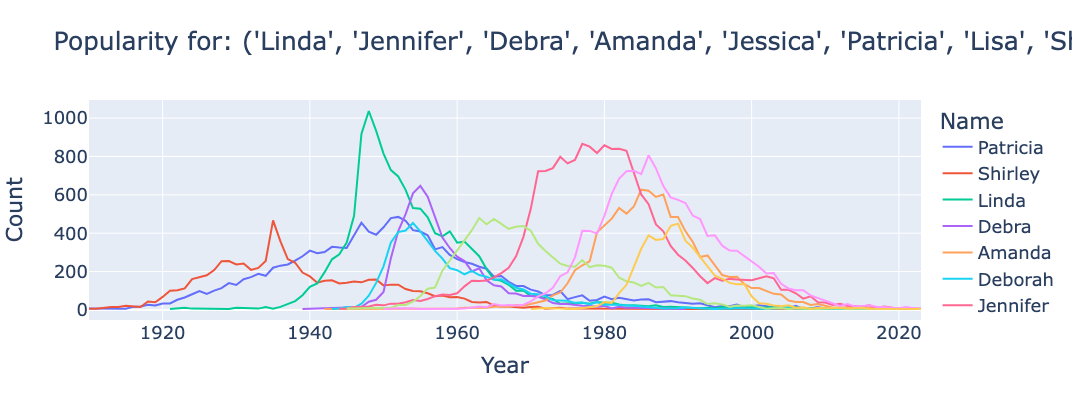

In [123]:
plot_name(*top10)

For fun, try plotting your name or your friends' names.

In [142]:
# What name assigned to Sex=M has dropped the most in popularity?

...

Count
Name             
Jeffrey  0.014970
Gary     0.015521
Larry    0.015748
Ronald   0.016086
Mike     0.019920
Randy    0.020747
Donald   0.023121
Shawn    0.024272
Chad     0.024510
Kyle     0.024938
Scott    0.025057
Dennis   0.025210
Todd     0.025751
Steve    0.025907
Steven   0.026263

In [189]:
# Write code to compute the total number of babies with each name:

...

Count
Name          
Aaden       65
Aadhya      10
Aaliyah   1516
Aanya        5
Aaralyn     12
...        ...
Zuleyka      5
Zuri       124
Zyaire      44
Zyla        11
Zyon        10

[5562 rows x 1 columns]

In [152]:
# Write code to compute the total number of babies born each year:

puzzle2 = ...

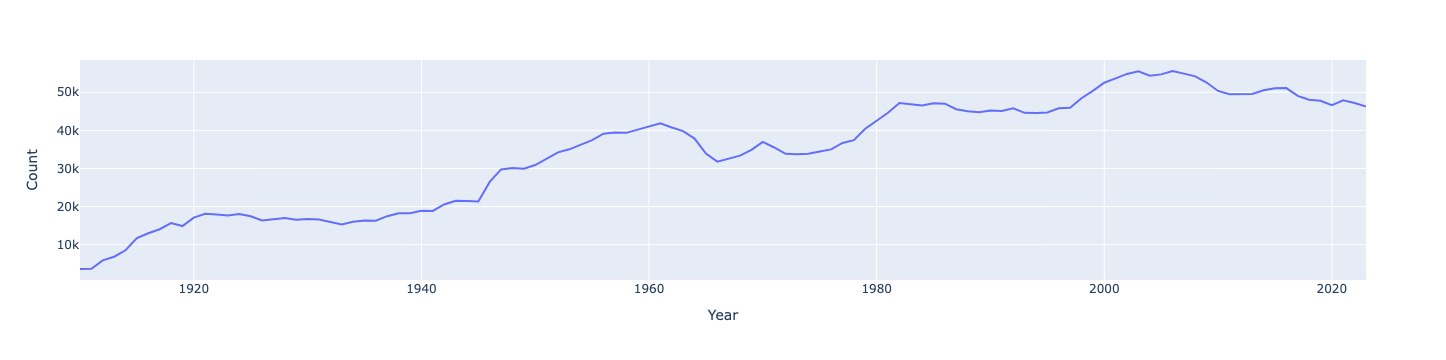

In [154]:
# run this cell to plot the number of babies born in Colorado each year according to this data
px.line(puzzle2, y="Count")

## Joining Tables

In [196]:
# create a dataframe of names of babies born in Colorado in 2023:

babynames_2023 = ...
babynames_2023

State Sex  Year       Name  Count
63786     CO   F  2023  Charlotte    288
63787     CO   F  2023     Olivia    265
63788     CO   F  2023     Sophia    212
63789     CO   F  2023       Emma    211
63790     CO   F  2023     Amelia    200
...      ...  ..   ...        ...    ...
116920    CO   M  2023       Zain      5
116921    CO   M  2023      Zakai      5
116922    CO   M  2023     Zakari      5
116923    CO   M  2023  Zechariah      5
116924    CO   M  2023  Zephaniah      5

[1959 rows x 5 columns]

In [200]:
# Add a column to the elections DataFrame called "First Name" with the First Name of each candidate
elections["First Name"] = ...
elections

Year               Candidate                  Party  Popular vote Result  \
0    2024           Kamala Harris             Democratic      75019230   loss   
1    2024            Donald Trump             Republican      77303568    win   
2    2024              Jill Stein                  Green        861155   loss   
3    2024  Robert F. Kennedy Jr.             Independent        756383   loss   
4    2024            Chase Oliver            Libertarian        650130   loss   
..    ...                     ...                    ...           ...    ...   
183  1832            William Wirt           Anti-Masonic        100715   loss   
184  1828          Andrew Jackson             Democratic        642806    win   
185  1828       John Quincy Adams    National Republican        500897   loss   
186  1824          Andrew Jackson  Democratic-Republican        151271   loss   
187  1824       John Quincy Adams  Democratic-Republican        113142    win   

             % First Name  
0    48.336772     Kamala  
1    49.808629     Donald  
2     0.554864       Jill  
3     0.487357     Robert  
4     0.418895      Chase  
..         ...        ...  
183   7.821583    William  
184  56.203927     Andrew  
185  43.796073       John  
186  57.210122     Andrew  
187  42.789878       John  

[188 rows x 7 columns]

In [204]:
# merge the elections DataFrame with the babynames_2023 DataFrame:

merged = ...
merged

Year_x               Candidate                               Party  \
0      2024            Donald Trump                          Republican   
1      2024  Robert F. Kennedy Jr.                          Independent   
2      2024            Chase Oliver                         Libertarian   
3      2024      Claudia De La Cruz  Party for Socialism and Liberation   
4      2020            Joseph Biden                          Democratic   
..      ...                     ...                                 ...   
107    1832            William Wirt                        Anti-Masonic   
108    1828          Andrew Jackson                          Democratic   
109    1828       John Quincy Adams                 National Republican   
110    1824          Andrew Jackson               Democratic-Republican   
111    1824       John Quincy Adams               Democratic-Republican   

     Popular vote Result          % First Name State Sex  Year_y     Name  \
0        77303568    win  49.808629     Donald    CO   M    2023   Donald   
1          756383   loss   0.487357     Robert    CO   M    2023   Robert   
2          650130   loss   0.418895      Chase    CO   M    2023    Chase   
3          165095   loss   0.106375    Claudia    CO   F    2023  Claudia   
4        81268773    win  51.313678     Joseph    CO   M    2023   Joseph   
..            ...    ...        ...        ...   ...  ..     ...      ...   
107        100715   loss   7.821583    William    CO   M    2023  William   
108        642806    win  56.203927     Andrew    CO   M    2023   Andrew   
109        500897   loss  43.796073       John    CO   M    2023     John   
110        151271   loss  57.210122     Andrew    CO   M    2023   Andrew   
111        113142    win  42.789878       John    CO   M    2023     John   

     Count  
0        8  
1       64  
2       30  
3        7  
4       87  
..     ...  
107    205  
108     68  
109    120  
110     68  
111    120  

[112 rows x 12 columns]

In [206]:
# Sort the merged data, with Count in Descending order
...

Year_x           Candidate                               Party  \
59     1912  Theodore Roosevelt                         Progressive   
64     1904  Theodore Roosevelt                          Republican   
42     1948    Henry A. Wallace                         Progressive   
106    1832          Henry Clay                 National Republican   
98     1844          Henry Clay                                Whig   
..      ...                 ...                                 ...   
10     2008         Ralph Nader                         Independent   
6      2020      Howard Hawkins                               Green   
3      2024  Claudia De La Cruz  Party for Socialism and Liberation   
29     1984       Ronald Reagan                          Republican   
32     1980       Ronald Reagan                          Republican   

     Popular vote Result          % First Name State Sex  Year_y      Name  \
59        4122721   loss  27.457433   Theodore    CO   M    2023  Theodore   
64        7630557    win  56.562787   Theodore    CO   M    2023  Theodore   
42        1157328   loss   2.374144      Henry    CO   M    2023     Henry   
106        484205   loss  37.603628      Henry    CO   M    2023     Henry   
98        1300004   loss  49.250523      Henry    CO   M    2023     Henry   
..            ...    ...        ...        ...   ...  ..     ...       ...   
10         739034   loss   0.563842      Ralph    CO   M    2023     Ralph   
6          405035   loss   0.255742     Howard    CO   M    2023    Howard   
3          165095   loss   0.106375    Claudia    CO   F    2023   Claudia   
29       54455472    win  59.023326     Ronald    CO   M    2023    Ronald   
32       43903230    win  50.897944     Ronald    CO   M    2023    Ronald   

     Count  
59     256  
64     256  
42     253  
106    253  
98     253  
..     ...  
10       7  
6        7  
3        7  
29       6  
32       6  

[112 rows x 12 columns]

In [212]:
# Find the top 10 most popular presidential names for babies in 2023:

...

Count
Name           
Theodore    256
Henry       253
William     205
James       191
Benjamin    182
Samuel      128
John        120
Thomas      115
Charles     111
Michael     105

[Back to top](#top)

<a id='p2'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 2: Evidence for Money Ball

In the book [MoneyBall](https://en.wikipedia.org/wiki/Moneyball), Michael Lewis documented the introduction of statistics and data science in selecting players for the Oakland A's. 
    
The central premise of Moneyball is that the collective wisdom of baseball insiders (including players, managers, coaches, scouts, and the front office) over the past century is outdated, subjective, and often flawed. That the statistics traditionally used to gauge players, such as stolen bases, runs batted in, and batting average, are relics of a 19th-century view of the game.  Sabermetrics and statistical analysis had demonstrated, for example, that on-base percentage and slugging percentage are better measures of batting. The Oakland A's began seeking players who were "undervalued in the market"—that is, who were receiving lower salaries relative to their ability to contribute to winning, as measured by these advanced statistics.
   
In this problem, we're going to investigate Oakland A's wins and payroll amounts compared to other successful teams during the time period that Moneyball investigates.  

Do to this we'll use two datasets from the [Sean Lahman's Baseball Database](http://seanlahman.com/) which contains the "complete batting and pitching statistics from 1871 to 2022, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."   

For more details about this data, see documentation.txt in the `data` folder.  




## Exploratory Data Analysis

Throughout this question you will be asked to explore the dataset.  
You will need familiarity with all the methods and attributes introduced in  Chapter 6 of the assigned reading:  [Learning Data Science Chapter 6 - All (Subsetting, Aggregating, Joining, Transforming)](https://learningds.org/ch/06/pandas_intro.html).  

There is frequently more than one way to answer question in Pandas, so we encourage you to dive in and play around with different approaches.  Unless otherwise indicated, you are welcome to use whatever methods/attributes/approach that you choose.

There are two .csv files in the `data` folder of this assignment:  `teams.csv` and `salaries.csv`

Import the `Teams.csv` data into a DataFrame called `teams_df` and take a look at the data. 


In [8]:
# Run this cell to load the Teams data:
teams_df=pd.read_csv("data/Teams.csv") 
teams_df.head()

yearID lgID teamID franchID divID  Rank   G  Ghome   W   L  ...  DP     FP  \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10  ...  24  0.834   
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9  ...  16  0.829   
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19  ...  15  0.818   
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12  ...   8  0.803   
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17  ...  14  0.840   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF  teamIDBR  teamIDlahman45  teamIDretro  
0   98       BOS             BS1          BS1  
1  102       CHI             CH1          CH1  
2  100       CLE             CL1          CL1  
3  107       KEK             FW1          FW1  
4   88       NYU             NY2          NY2  

[5 rows x 48 columns]

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2a (1 pt) ###

Import the `Salaries.csv` data into a DataFrame called `salaries_df` and take a look at the data.

In [14]:
# Load the Salaries data:

salaries_df=pd.read_csv("data/Salaries.csv") # SOLUTION

salaries_df.head()

yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000

In [ ]:
grader.check("q2a")

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2b (5 pts) ###
    
Examine the structure, granularity and faithfulness of the datasets.   (Hint: The common utility functions we covered in class will be useful here).  

Then answer the following questions:

 - i).  What does the column `G` represent in the teams dataset?  (For a description of the columns, see the documentation in the `data` folder).  

 - ii).  What is the granularity of the `teams.csv` file?  

 - iii).  What is the granularity of the `salary.csv` file?
 
 - iv).  How many rows and columns are in the teams dataset?    Assign your answer to the variables `team_rows` and `team_col` below.  

 - v).  How many rows and columns are in the salary dataset? Assign your answer to the variables `salary_rows` and `salary_col` below.

 - vi).  How many entries in the `teams.csv` file are missing Attendance Data?  Assign your answer to the variable `missing_attendance` below.

### Answer Cell for Questions 2b(i)(ii)(iii) 
In this cell, answer questions 2b(i) - (iii) using Markdown (not code).  

**2b(i) Answer:**

**2b(ii) Answer**:

**2b(iii) Answer**:

In the code cells below justify your answers to part (ii) and (iii) and then answer parts iv through vi

In [16]:
# BEGIN SOLUTION

teams_df[["yearID", "teamID"]].value_counts().max()

# END SOLUTION

# Show work in this cell justifying your answer to part 4a(ii) (hint: either use .value_counts() or .groupby)

1

In [18]:
# BEGIN SOLUTION

salaries_df[["yearID","teamID", "playerID"]].value_counts().max()


# END SOLUTION

# Show work in this cell justifying your answer to part 4a(iii) (hint: either use .value_counts() or .groupby)

1

In [20]:
# Solution Cell for 4a(iv) and 4a(v)
#Use code to find the number of rows and columns in the teams data.  Do not enter any values by hand.

team_rows= teams_df.shape[0]   #SOLUTION

team_col = teams_df.shape[1]  #SOLUTION

salary_rows = salaries_df.shape[0]  #SOLUTION

salary_col = salaries_df.shape[1] #SOLUTION



In [22]:
# Solution Cell for 4a(vi)
# Use code to find the number of rows in the Teams data that are missing attendance data

missing_attendance = teams_df["attendance"].isna().sum() # SOLUTION


In [ ]:
grader.check("q2b")

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2c (4 pts) EDA:  Examining Scope and Temporality of the Data ###
    

 Use code to explore the datasets and answer the questions below:
 
 i).  How many unique teams are represented in the `teams_df` DataFrame?  Write code to calculate this and assign the answer to the variable `unique_teams`   
 
 ii). How many unique teams are represented in the `salaries_df` DataFrame? Write code to calculate this and assign the answer to `unique_teams_salary`
 
 iii).  What years does the `teams_df` data span?  
 Write code to calculate this and assign the answers to `teams_startyear` and `teams_endyear`

 
 iv).  What years does the `salaries_df` data span?   
 Write code to calculate this and assign the answers to `salaries_startyear` and `salaries_endyear`
 

In [26]:
# Answer to 2ci:

unique_teams = len(teams_df["teamID"].unique()) #SOLUTION

#print out result
unique_teams


149

In [27]:
# Answer to 2cii:

unique_teams_salary=len(salaries_df["teamID"].unique()) #SOLUTION

#print out result
unique_teams_salary

35

In [28]:
# Answer to 2ciii:

teams_startyear = teams_df["yearID"].unique().min() # SOLUTION

teams_endyear = teams_df["yearID"].unique().max() # SOLUTION

#print out result
[teams_startyear, teams_endyear]

[1871, 2022]

In [29]:
# Answer to 2civ:


salaries_startyear = salaries_df["yearID"].unique().min() # SOLUTION

salaries_endyear = salaries_df["yearID"].unique().max() # SOLUTION

#print out result
[salaries_startyear, salaries_endyear]

[1985, 2016]

In [ ]:
grader.check("q2c")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2d (3 pts) ###
    
If you haven't already, **read the assigned textbook readings** [on Filtering](https://learningds.org/ch/06/pandas_subsetting.html#filtering-rows) and  [on Extracting Data](https://learningds.org/ch/06/pandas_subsetting.html).


 i ). For the data science approach used by the Oakland A's team in 2002, they used historical baseball data starting in 1998.  We're going to analyze some of this Oakland A's data, so we'll start by filtering out a smaller dataframe that just focuses on the years and columns of interest.     
    
Filter the `teams_df` to create a new dataframe `teams_df_moneyball` with **index** `teamID` and columns `yearID`, `name`, `G`, `W`.  The new dataframe should only include records where the year is greater than or equal to 1998. (Hint, the dataframe method`set_index` will be useful https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
 
ii).  Add a new column called `winFrac` to the dataframe `teams_df_moneyball` that calculates the number of Wins divided by the number of Games for a given team in a given year, **rounded to the nearest hundredth**.  (Don't use any `for` loops when populating the new column).  The python built-in `round` function will be helpful (https://www.w3schools.com/python/ref_func_round.asp).


iii).  Use an appropriate extraction operator to determine the Oakland A's (teamID ="OAK") fraction of wins in the year 1998.  Write code (do not just manually enter the value that you read off of a table)  that selects this value from the `teams_df_moneyball` table) and assigns it to the variable `winFrac_OAK_98`.      
  
 


In [8]:
# Create teams_df_moneyball dataframe

teams_df_moneyball = teams_df.loc[(teams_df["yearID"]>=1998), ["yearID", "teamID", "G", "W", "name"]].set_index("teamID") # SOLUTION



In [9]:
# Add column called winFrac to the dataframe

teams_df_moneyball["winFrac"] = round(teams_df_moneyball["W"]/teams_df_moneyball["G"],2) # SOLUTION

# Print out resulting DataFrame
teams_df_moneyball.head()

yearID    G    W                  name  winFrac
teamID                                                 
ANA       1998  162   85        Anaheim Angels     0.52
ARI       1998  162   65  Arizona Diamondbacks     0.40
ATL       1998  162  106        Atlanta Braves     0.65
BAL       1998  162   79     Baltimore Orioles     0.49
BOS       1998  162   92        Boston Red Sox     0.57

In [10]:
# Answer to part 2diii:

winFrac_OAK_98=teams_df_moneyball.loc[teams_df_moneyball["yearID"]==1998].loc["OAK"]["winFrac"]# SOLUTION

winFrac_OAK_98

0.46

In [ ]:
grader.check("q2d")

### EDA:  Visualizing Data 

Let's examine how winFrac has varied over time for the Oakland A's.

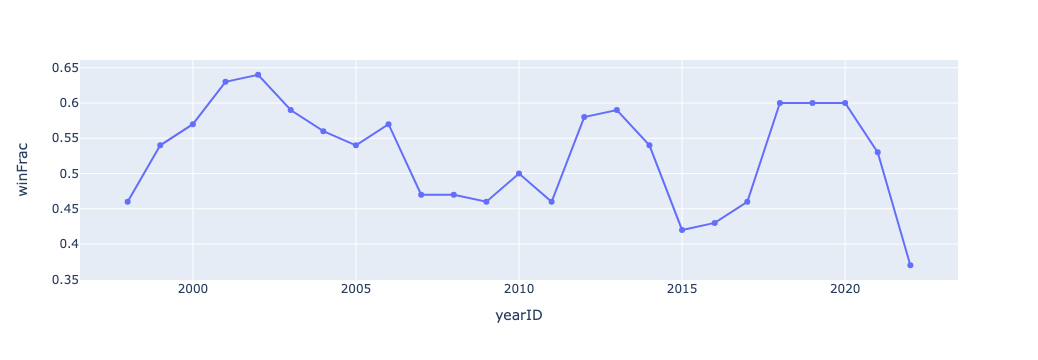

In [12]:
#The code below uses the module plotlyexpress, which we imported at the top of the notebook using alias px
#Read the code below to see how to use this function, then run this cell

px.line(teams_df_moneyball.loc["OAK"],x="yearID", y="winFrac", markers=True)



Let's compare Oakland's winFrac to 2 other teams:  Boston Red Sox and the New York Yankees.  We can visualize this using size-by-size line plots:

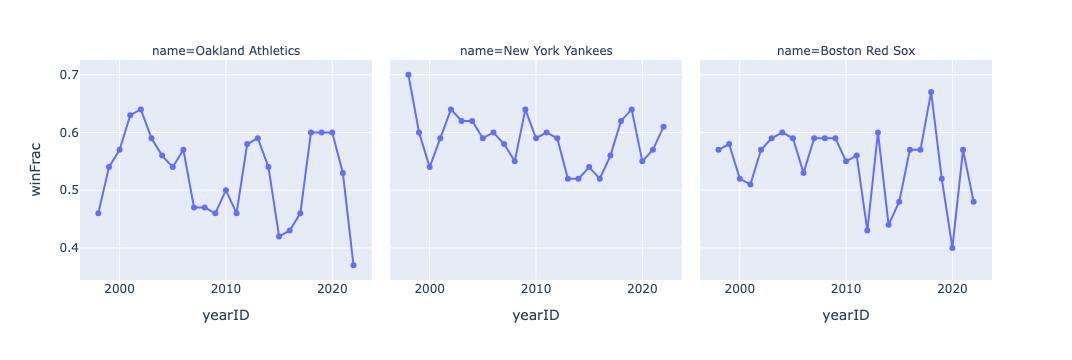

In [14]:
#Read the entries below to see how to create this plot:
#Then run this cell

px.line(teams_df_moneyball.loc[["OAK","NYA", "BOS"]],x="yearID", y="winFrac",facet_col = 'name', markers=True)



### Payrolls Per Team


However, the interesting part of this story takes into account the salary differences between these teams, particularly during the time period from 1999-2004 (Oakland first began implementing a data science approach to choose their players in 2002).   


Let's calculate the yearly team payrolls for OAK, NYA and BOS from 1999 to 2004.   A team payroll is the sum of all the players' salaries who are on that team in a given year.  
To do this, we will need to aggregate data in the `salary_df`.   If you haven't already, [read the section from the assigned readings on Grouping](https://learningds.org/ch/06/pandas_aggregating.html), including the section on aggregating by multiple columns. 





<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2e (4 pts) ###
    
To simplify the size of the DataFrame we're working with, start by selecting from the `salary_df` the columns `teamID`, `yearID` and `salary` and the subset of rows the with players with `teamID` equal to either `OAK`, `NYA` or `BOS`, for the years starting in 1999 and ending in 2004.    
Save this data in a new DataFrame `salaries_subset`.   (Keep the same index from the `salary_df`).



In [15]:
# Create salaries_subset DataFrame:

salaries_subset = salaries_df[["teamID","yearID","salary"]][(salaries_df["yearID"]>=1999) & (salaries_df["yearID"]<=2004) & ((salaries_df["teamID"] == "OAK") | (salaries_df["teamID"]=="NYA" )| (salaries_df["teamID"]=="BOS"))] # SOLUTION


In [ ]:
grader.check("q2e")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2f (4 pts) ###


Next, group the `salary_subset` DataFrame on the columns `teamID` and `yearID` (in that order) and sum the players' salaries.   Save this aggregated data to a new DataFrame called `payroll_df`.

Then rename the aggregated column from salary to `payroll` (hint: use `.rename(columns = {"oldname":"newname"})`

After grouping, notice there will be two levels to the index (`teamID`, `yearID`),  because we grouped by two columns. 

In [20]:
# Group the salaries_subset DataFrame and save the results 
# to payroll_df:

payroll_df = salaries_subset.groupby(["teamID","yearID"]).sum() # SOLUTION



# Rename the aggregated column:

payroll_df = payroll_df.rename(columns = {"salary":"payroll"}) # SOLUTION

payroll_df.head()

payroll
teamID yearID           
BOS    1999     63497500
       2000     77940333
       2001    110035833
       2002    108366060
       2003     99946500

In [ ]:
grader.check("q2f")

# Merging Data

Let's merge the win data from `teams_df_moneyball` with the `payroll_df` dataframe so we can compare wins and payroll.

We'll do this in several steps:

The primary key in both DataFrames is `teamID` AND `yearID`.  The DataFrame `payroll_df` already has these both defined as indices (i.e. these are called a  a multi-index).  
Let's also define these as a multi-index in the `teams_df_moneyball` DataFrame, to make the merging process easier.
To start, we'll reset the index in the `teams_df_moneyball`:"


In [21]:
teams_df_moneyball = teams_df_moneyball.reset_index()
teams_df_moneyball.head()

teamID  yearID    G    W                  name  winFrac
0    ANA    1998  162   85        Anaheim Angels     0.52
1    ARI    1998  162   65  Arizona Diamondbacks     0.40
2    ATL    1998  162  106        Atlanta Braves     0.65
3    BAL    1998  162   79     Baltimore Orioles     0.49
4    BOS    1998  162   92        Boston Red Sox     0.57

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2g (2 pts) ###
    
Change the index of the `teams_df_moneyball` DataFrame to be a multi-index using the columns `teamID` and `yearID` (in that order):


In [56]:
teams_df_moneyball = teams_df_moneyball.set_index(["teamID", "yearID"]) # SOLUTION
teams_df_moneyball.head()

G    W                  name  winFrac
teamID yearID                                         
ANA    1998    162   85        Anaheim Angels     0.52
ARI    1998    162   65  Arizona Diamondbacks     0.40
ATL    1998    162  106        Atlanta Braves     0.65
BAL    1998    162   79     Baltimore Orioles     0.49
BOS    1998    162   92        Boston Red Sox     0.57

In [ ]:
grader.check("q2g")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2h (3 pts) ###

Merge the `payroll_df` and `teams_df_moneyball` DataFrames using an inner join (that is, only keeping rows that appear in both DataFrames). 

Tip: Since they both have the same multi-indices, you will join on their Indices (not on columns).   See the [documentation for merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) for the default inputs.  

In [59]:
payroll_df_merged = payroll_df.merge(teams_df_moneyball, how = 'inner',  left_index= True,  right_index = True) # SOLUTION

payroll_df_merged.head()

payroll    G   W            name  winFrac
teamID yearID                                             
BOS    1999     63497500  162  94  Boston Red Sox     0.58
       2000     77940333  162  85  Boston Red Sox     0.52
       2001    110035833  161  82  Boston Red Sox     0.51
       2002    108366060  162  93  Boston Red Sox     0.57
       2003     99946500  162  95  Boston Red Sox     0.59

In [ ]:
grader.check("q2h")

Let's examine the fraction of wins and payroll for the Oakland A's in 2002 and compare it to the the New York Yankees that same year:

To access values using a multiindex we need to use parantheses in the first entry, as shown here:

In [64]:
# Read this code to make sure you understand how to access data with a multi-index, then run this cell:

oak_payroll_02 = payroll_df_merged.loc[("OAK",2002),"payroll"]
oak_winfrac_02 = payroll_df_merged.loc[("OAK",2002),"winFrac"]

print("Oakland's payroll in 2002 was ", oak_payroll_02, " and its WinFrac was", oak_winfrac_02)

Oakland's payroll in 2002 was  40004167  and its WinFrac was 0.64


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2i (2 pts) ###

Calculate these same statistics for the New York Yankees ("NYA") in 2002:

In [65]:
nya_payroll_02 = payroll_df_merged.loc[("NYA",2002),"payroll"]  # SOLUTION
nya_winfrac_02 = payroll_df_merged.loc[("NYA",2002),"winFrac"]  # SOLUTION

print("New York Yankee's payroll in 2002 was ", nya_payroll_02, " and its WinFrac was", nya_winfrac_02)

New York Yankee's payroll in 2002 was  125928583  and its WinFrac was 0.64


In [ ]:
grader.check("q2i")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 2j (3 pts) ###

**Payroll efficiency** in baseball is defined as the "payroll dollars spent per win". The lower the number, the better efficiency you have.
Add a column to `payroll_df_merged` called `efficiency` that calculates the efficiency for each team each year.   
Hint: Do this without using a "for" loop.

In [68]:
payroll_df_merged = payroll_df_merged.assign(efficiency =payroll_df_merged["payroll"]/payroll_df_merged["W"]) # SOLUTION


In [ ]:
grader.check("q2j")

### Visualizing Efficiency

We can compare Payroll efficiency between these 3 teams using the side-by-side line plots below:

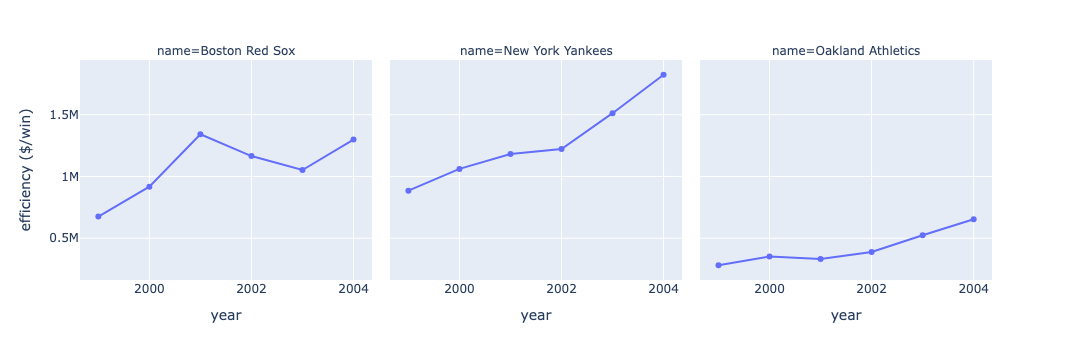

In [71]:
# Just run this cell:

# Reset index before plotting, as plot inputs easier to handle without single index
payroll_df_merged = payroll_df_merged.reset_index()

# Code to plot side-by-side line plots of efficiency:
px.line(payroll_df_merged,x="yearID", y="efficiency",facet_col = 'name', markers=True, labels=dict(efficiency="efficiency ($/win)", yearID="year"))



**From 1998 to 2008, the Oakland Athletics were the most payroll efficient team in Major League Baseball (MLB), recording the 5th highest win percentage despite having the 7th lowest payroll to work with. Their remarkable success has been widely attributed to the innovative data science strategies employed by general manager Billy Beane designed to identify undervalued statistics and players.**


[Back to top](#top)

<a id='p3'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 3: Prerequisites: Calculus Review ##

You will need a solid understanding of the following concepts from Calculus 1 and 2 to succeed in this course. See the  [Prerequisite Review Resources posted on the  Modules in Canvas](https://canvas.colorado.edu/courses/117881/pages/prerequisite-review-calculus-and-discrete-structures?module_item_id=6055980)  posted on Canvas if you need to review any of these key concepts.


### Preliminary: Sums ###

Here's a recap of some basic algebra written in sigma notation. The facts are all just applications of the ordinary associative and distributive properties of addition and multiplication, written compactly and without the possibly ambiguous "...". But if you are ever unsure of whether you're working correctly with a sum, you can always try writing $\sum_{i=1}^n a_i$ as $a_1 + a_2 + \cdots + a_n$ and see if that helps.

- You can use any reasonable notation for the index over which you are summing, just as in Python you can use any reasonable name in `for name in list`. Thus $\sum_{i=1}^n a_i = \sum_{k=1}^n a_k$.
- $\sum_{i=1}^n (a_i + b_i) = \sum_{i=1}^n a_i + \sum_{i=1}^n b_i$
- $\sum_{i=1}^n d = nd$
- $\sum_{i=1}^n (ca_i + d) = c\sum_{i=1}^n a_i + nd$


<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 3a (2 pts) ###

We commonly use sigma notation to compactly write the definition of the arithmetic mean (commonly known as the average):

$$\bar{x} = \frac{1}{n}\left(x_1+x_2+ ... + x_n \right) = \frac{1}{n}\sum_{i=1}^n x_i$$



The $i$th *deviation from average* is the difference $x_i - \bar{x}$. Prove that the sum of all these deviations is 0 that is, prove that $\sum_{i=1}^n (x_i - \bar{x}) = 0$ (write your full solution in the box directly below showing all steps and using LaTeX).


_Type your answer here, replacing this text._

**Solution**: 

$\sum_{i=1}^n (x_i - \bar{x}) = \sum_{i=1}^n x_i - \sum_{i=1}^n \bar{x} = n\bar{x} - n\bar{x} = 0$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 3b (4 pts) ###

Let $x_1, x_2, \ldots, x_n$ be a list of numbers. You can think of each index $i$ as the label of a household, and the entry $x_i$ as the annual income of Household $i$. 

Consider the function  $$f(c) = \frac{1}{n} \sum_{i=1}^n (x_i-c)^2$$


In this scenario, suppose that our data points $x_1, x_2, \ldots, x_n$ are fixed and that $c$ is the only variable.

Using calculus, determine the value of $c$ that minimizes $f(c)$.  You must use calculus to justify that this is indeed a minimum, and not a maximum.


_Type your answer here, replacing this text._

**Solution**  

We start by finding the value(s) of $c$ such that $f'(c) = 0$:


$$f(c) = \frac{1}{n} \sum_{i=1}^n (x_i-c)^2= \frac{1}{n}\left(\sum_{i=1}^n x_i^2 - \sum_{i=1}^n2x_ic+ \sum_{i=1}^n c^2 \right)$$

$$=\frac{1}{n}\sum_{i=1}^n x_i^2 - \frac{2c}{n} \sum_{i=1}^n x_i+ \frac{c^2}{n}\sum_{i=1}^n 1$$

Taking the derivative with respect to $c$ we get:

$$f'(c) = 0 - \frac{2}{n} \sum_{i=1}^n x_i+ \frac{2c}{n}(n)  = - \frac{2}{n} \sum_{i=1}^n x_i+ 2c$$

Setting this equal to 0 and solving for $c$:

$$f'(c) = 0 \implies - \frac{2}{n} \sum_{i=1}^n x_i+ 2c  = 0 \implies \frac{2}{n} \sum_{i=1}^n x_i = 2c$$

$$\implies \boxed{c=\frac{1}{n} \sum_{i=1}^n x_i = \bar{x}}$$


To test if this is a max or min, we use the 2nd derivative test:

$$f''(c) = 0+2$$ 

Thus $$f''(\bar{x}) = 2>0 \implies c=\bar{x}$$ is a minimum value


<!-- END QUESTION -->

[Back to top](#top)

<a id='p4'></a>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## <span style='color:Red'>  Question 4:  Applying Those Prereqs:  A Maximum Likelihood Estimate ##

In this problem we're going to apply your calculus and discrete math prerequisite knowledge to introduce a data science concept called a maximum likelihood estimate.

Data scientists use coin tossing as a visual image for sampling at random with replacement from a binary population.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 4a (2 pts) ###

A coin that lands heads with chance 0.7 is tossed six times. What is the chance of the sequence HHHTHT? Assign your answer to the variable `p_HHHTHT`.

In [8]:
p_HHHTHT = 0.7**4*(0.3**2)  #SOLUTION
p_HHHTHT

0.021608999999999996

In [ ]:
grader.check("q4a")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 4b (2 pts) ###
    
I have a coin that lands heads with an unknown probability $p$. 

Suppose I toss it 10 times and get the sequence TTTHTHHTTH.

If you toss this coin 10 times, the chance that you get the sequence above is a function of $p$. That function is called the *likelihood* of the sequence TTTHTHHTTH, so we will call it $L(p)$.



<!-- BEGIN QUESTION -->

What is $L(p)$ (i.e. the likelihood) for the sequence TTTHTHHTTH?

Enter your answer below by setting the `likelihood` variable equal to the correct function.

(For example `likelihood = sin(p)+2p`, althought that is definitely an incorrect answer!)

Then run the code below to plot the likelihood function.



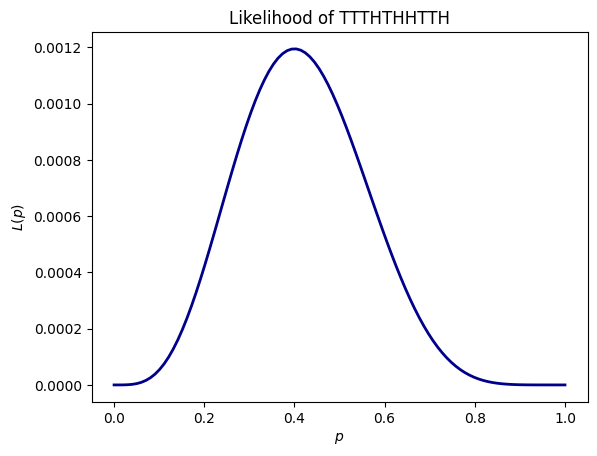

In [10]:
#At the top of the notebook we already imported a useful plotting module, matplotlib with alias plt

p = np.linspace(0, 1, 100) 
#This creates an array of 100 p-values equally spaced between 0 and 1

likelihood = (p**4)*(1-p)**6 #SOLUTION
#Define the likelihood function above

plt.plot(p, likelihood, lw=2, color='darkblue') 
#This plots the likelihood function  

plt.xlabel('$p$')
#This labels the x axis

plt.ylabel('$L(p)$')
#This labels the y-axis

plt.title('Likelihood of TTTHTHHTTH');
#This titles the plot

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 4c (1 pt) ###

The value $\hat{p}$ at which the likelihood function attains its maximum is called the *maximum likelihood estimate* (MLE) of $p$. Among all values of $p$, it is the one that makes the observed data most likely.

Using only your plot above, what is the value of $\hat{p}$?   


In [11]:
p_hat = 0.4  # SOLUTION

In [ ]:
grader.check("q4c")

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


## <span style='color:Red'>   Question 4d (4 pts) ###

Notice the value you found graphically for $\hat{p}$ above also intuitively makes sense because it is also the observed proportion of heads in the given sequence TTTHTHHTTH.


Let's prove what you observed graphically above.  That is, let's use calculus to find $\hat{p}$.  

But **wait before you start trying to find the value $p$ where $L'(p)=0$ (trust us, the algebra is not pretty...)**

USEFUL TIP: 
The value $\hat{p}$ at which the function $L(p)$ attains its maximum is the same as the value at which the function $\ln(L(p))$ attains its maximum. 

This tip is hugely important in data science because many probabilities are products and the natural log function `ln` function turns products into sums.  It's **much simpler to take derivatives of a sum** than a product.


Thus, to find the value $p$ where $L'(p)=0$: 
 - Take the natural log `ln` of L(p)
 - Use properties of logs to rewrite products in `ln(L(p))` as sums
 - Take the derivative of this rewritten version of `ln(L(p))`
 - Solve $\frac{d}{dp}\left[\ln(L(p))\right] = 0$ for p
 - You should get the same answer that you found graphically above.

You don't have to check that the value you've found produces a max and not a min – we'll spare you that step.

Show all steps in the cell below using Markdown and LaTeX





_Type your answer here, replacing this text._

**Solution:**

$\log(L(p)) = \log(p^4(1-p)^6) = 4\log(p) + 6\log(1-p)$.

$\implies \frac{d}{dp}\left( \log(L(p) \right) = \frac{4}{p} - \frac{6}{1-p}$

Now we solve for where the derivative equals 0: 

$\frac{d}{dp}\left( \log(L(p) \right) =0$

$\implies \frac{4}{p} - \frac{6}{1-p} = 0$

$\implies \frac{p}{1-p} = \frac{4}{6}$

$\implies 6p=4(1-p)$

$\implies 6p=4-4p$

$\implies 10p=4$


$\implies \boxed{\hat{p} = 0.4}$

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 2!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced*

### Submission Instructions

Before proceeding any further, **save this notebook.**

In [224]:

# Run this cell before you run the 'grader.export()' cell below.  
# It will search for common LaTeX errors that will cause the LaTeX compiler to fail.  

import simple_latex_checker as slc

nb = slc.Nb_checker()
nb.run_check("hw02.ipynb")

No detected errors. Export can be run.




After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 


* **Homework 2 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW2 Autograded assignment in Gradescope.

* **Homework 2 Manually Graded**: Submit your hw02.PDF to the HW2 Manually Graded assignment in Gradescope.  **It is your responsibility to fully review your PDF file before submitting and make sure that all your lines of code are visible and any LaTeX has correctly compiled and is fully viewable.**  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.** If not, you will lose points.    

**TROUBLESHOOTING TIPS**  If you are having any issues compiling your assignment, please [read through these troubleshooting tips first](https://docs.google.com/document/d/1ndr3Wj1PSF5qzlLMaBJznwh6QGeEXjd5TAJ6nf9EJvo/edit?usp=sharing), then post any questions on Piazza.  

**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Be sure to SAVE this notebook BEFORE running the next cell.  AFTER running the cell below, click on <a href='hw02.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)